In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import importlib
import crypto_object

import tqdm

%matplotlib inline

print('modules loaded')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


modules loaded


In [2]:
crypto_object = importlib.reload(crypto_object)

In [3]:
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')

In [4]:
btc.full_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Pct Returns
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",0.015893
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",0.063828
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",-0.050474
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",0.085871
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",0.006640


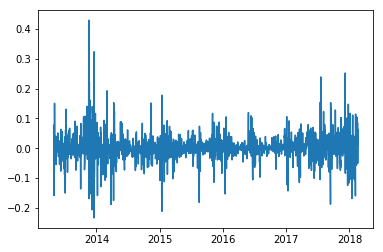

In [5]:
plt.plot(btc.full_data.loc[:,'Date'], btc.full_data.loc[:,'Pct Returns'])

In [6]:
(btc.full_data.loc[2,'Date'] - btc.full_data.loc[3,'Date']).days

1

In [7]:
import datetime

In [8]:
btc.full_data['Date'][btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")]

1   2018-02-19
Name: Date, dtype: datetime64[ns]

In [9]:
np.argwhere(btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d"))[0][0]

1

In [10]:
datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")

datetime.datetime(2018, 2, 19, 0, 0)

In [11]:
np.random.choice(btc.full_data['Pct Returns'])

-0.010670095926595473

In [12]:
import option_pricing as op

In [13]:
op = importlib.reload(op)

In [14]:
d1 = datetime.datetime.strptime('2016-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
out = op.random_paths(btc, d1, d2, lookback=60, N=50)

In [15]:
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
btc.full_data['Close'][(idx2):idx1].sort_index(ascending=False)

731     437.16
730     438.80
729     437.75
728     420.74
727     424.95
726     424.54
725     432.15
724     432.52
723     433.50
722     437.70
721     435.12
720     423.99
719     421.65
718     410.94
717     400.57
716     407.71
715     414.32
714     413.97
713     414.86
712     417.13
711     421.69
710     411.62
709     414.06
708     416.44
707     416.83
706     417.01
705     420.62
704     409.55
703     410.44
702     413.75
        ...   
395     921.79
394     924.67
393     921.01
392     892.69
391     901.54
390     917.59
389     919.75
388     921.59
387     919.50
386     920.38
385     970.40
384     989.02
383    1011.80
382    1029.91
381    1042.90
380    1027.34
379    1038.15
378    1061.35
377    1063.07
376     994.38
375     988.67
374    1004.45
373     999.18
372     990.64
371    1004.55
370    1007.48
369    1027.44
368    1046.21
367    1054.42
366    1047.87
Name: Close, Length: 366, dtype: float64

In [16]:
idx2

366

In [17]:
def plot_random_paths(rp, true_path, coin):
    
    f, ax = plt.subplots(1,1, figsize=(12,8))
    
    dates = rp.index
    
    rp = rp.sort_index(axis=0 ,ascending=False).values
    true_path = true_path.sort_index(ascending=False).values
    
    N = rp.shape[1]
    
    for i in np.arange(N):
        ax.plot(dates, rp[:, i], color='blue', alpha=.2)
        
    ax.plot(dates, true_path, color='red')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('{} Price'.format(coin.name))
    ax.set_title(coin.name)

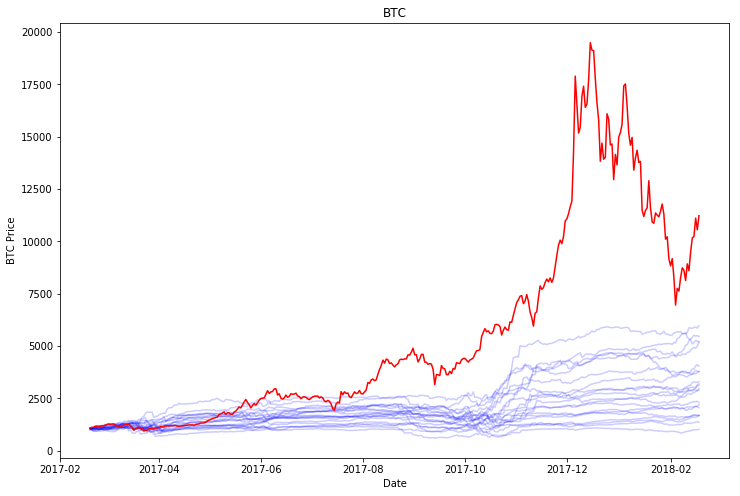

In [19]:
d1 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
out = op.random_paths(btc, d1, d2, lookback=15, N=20)
plot_random_paths(out, btc.full_data['Close'][idx2:idx1].reset_index()['Close'], btc)

In [20]:
out.iloc[-1, :]

0     1068.630199
1     1041.360688
2     1067.013230
3     1068.630199
4     1071.287217
5     1050.926353
6     1061.086525
7     1032.235848
8     1032.235848
9     1071.287217
10    1066.625610
11    1041.360688
12    1068.630199
13     980.162144
14     980.162144
15    1067.013230
16    1058.896023
17    1061.086525
18    1042.372190
19    1068.630199
Name: 2018-02-18 00:00:00, dtype: float64

In [21]:
np.nanmax([np.nanmean(out.iloc[-1, :]), 0])

1049.981613793083

In [24]:
from importlib import reload # python 3
op = reload(op)

In [25]:
op.empirical_method(btc, d1, d2, 0, 5000, 'call', lookback=30, N=500)

113.69744460757053

In [ ]:
#####
# Options Strip
######

In [26]:
def get_options_strip(coin, current_date, r, N_iter):
    
    # near and far dates
    near_term = current_date + datetime.timedelta(days=5)
    next_term = current_date + datetime.timedelta(days=30)
    
    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]
    
    # produces ks to search over
    ks_near = np.linspace(starting_price * .9, starting_price * 1.1, 10)
    ks_next = np.linspace(starting_price * .8, starting_price * 1.2, 20)
    
    # near term options
    near_term_calls = np.empty((10, ))
    near_term_puts = np.empty((10, ))
    
    # next term options
    next_term_calls = np.empty((20, ))
    next_term_puts = np.empty((20, ))
    
    for i, k in enumerate(ks_near):
        near_term_calls[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=5, N=N_iter)
        near_term_puts[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=5, N=N_iter)
        
    for i, k in enumerate(ks_next):
        next_term_calls[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=30, N=N_iter)
        next_term_puts[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=30, N=N_iter)
        
    near_term_df = pd.DataFrame([near_term_calls, near_term_puts]).T
    near_term_df.columns = ['Calls', 'Puts']
    near_term_df.index = ks_near
    next_term_df = pd.DataFrame([next_term_calls, next_term_puts]).T
    next_term_df.columns = ['Calls', 'Puts']
    next_term_df.index = ks_next
    
    return (near_term_df, next_term_df)

In [27]:
a = get_options_strip(btc, d1, 0, 100)[0]

In [28]:
a.loc[a.mean(axis=1).idxmin()]

Calls    22.765592
Puts      9.563283
Name: 1059.513, dtype: float64

In [29]:
a.loc[a.mean(axis=1).idxmin()]

Calls    22.765592
Puts      9.563283
Name: 1059.513, dtype: float64

In [30]:
pd.DataFrame([np.ones(5), np.ones(5)]).T

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [31]:
cls = a['Calls'].index.values

In [32]:
cls

array([ 943.083,  966.369,  989.655, 1012.941, 1036.227, 1059.513,
       1082.799, 1106.085, 1129.371, 1152.657])

In [33]:
cls[(1059.5129999999999 - cls).argmin()]

1152.657

In [34]:
cls = 1059.5129999999999 - cls

In [35]:
cls[cls > 0].argmin()

4

In [36]:
from __future__ import division

def closest_call_or_put(val, array, call_or_put):
    
    try:
        # loop through array and return propery idx
        if call_or_put == 'call':
            return min(array[array - val > 0])
        else:
            return max(array[val - array > 0])
    except:
        return val
        
        

def cryptoVix(coin, current_date, r, N_iter, N_paths):
    
    vix = np.empty((N_iter,))
    for i in np.arange(N_iter):
    
        # near and next options strip
        near_strip, next_strip = get_options_strip(coin, current_date, r, N_paths)

        # get idx where calls and puts differ the least
        near_closest_idx = near_strip.mean(axis=1).idxmin()
        next_closest_idx = next_strip.mean(axis=1).idxmin()

        T_1 = 5/365
        T_2 = 30/365

        # near and next forward prices
        F_near = near_closest_idx + (np.exp(r * T_1) * \
                    (near_strip.loc[near_closest_idx, 'Calls'] - \
                     near_strip.loc[near_closest_idx, 'Puts']))

        F_next = next_closest_idx + (np.exp(r * T_2) * \
                    (next_strip.loc[next_closest_idx, 'Calls'] - \
                     next_strip.loc[next_closest_idx, 'Puts']))

        # near/next strikes to find K_0s
        ks_near = near_strip.index.values
        ks_next = next_strip.index.values
        
        

        k_0_near_call = closest_call_or_put(near_closest_idx, ks_near, 'call')
        k_0_near_put = closest_call_or_put(near_closest_idx, ks_near, 'put')

        k_0_next_call = closest_call_or_put(next_closest_idx, ks_next, 'call')
        k_0_next_put = closest_call_or_put(next_closest_idx, ks_next, 'put')

        # strikes given by np.linspace so the delta for strikes is constant
        # therefore sufficient to calc one delta
        delta_near = np.abs((ks_near[1] - ks_near[0]) / 2)
        delta_next = np.abs((ks_next[1] - ks_next[0]) / 2)

        # near and next strikes for calls and puts to be calculated
        ks_near_puts = ks_near[ks_near < k_0_near_put]
        ks_near_calls = ks_near[ks_near > k_0_near_call]
        ks_next_puts = ks_next[ks_next < k_0_next_put]
        ks_next_calls = ks_next[ks_next > k_0_next_call]

        # calculate near vol
        near_sum = 0
        for k in ks_near_puts:
            near_sum = near_sum + near_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_near_calls:
            near_sum = near_sum + near_strip.loc[k, 'Calls'] / (k**2)

        sigma_2_near = (np.exp(r * T_1) * delta_near * (2 / T_1) * near_sum) - \
            ((1 / T_1) * (((F_near / np.nanmean([k_0_near_call, k_0_near_put])) - 1)**2))

        # calculate next vol
        next_sum = 0
        for k in ks_next_puts:
            next_sum += next_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_next_calls:
            next_sum += next_strip.loc[k, 'Calls'] / (k**2)


        sigma_2_next = (np.exp(r * T_2) * delta_next * (2 / T_2) * next_sum) - \
            ((1 / T_2) * (((F_next / np.nanmean([k_0_next_call, k_0_next_put])) - 1)**2))

        vix[i] = 100 * np.sqrt((T_1 * sigma_2_near) + (T_2 * sigma_2_next) * (365/30))
        
    return(np.nanmean(vix))

In [39]:
cryptoVix(btc, d1, 0, 20, 2) #reduced number of paths as test

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in sqrt


7.708027861907088

# VIX

Methodology:

* Create options strip 5 days in future and 30 days in future.
* Find forward price: strike at which call and put differs by the least amount.



In [43]:
import os
crypto_object = importlib.reload(crypto_object)

def load_coins(dir_):
    """
    Function to take in a directory containing data
    and return a dictionary of `Coin` objects
    """
    
    # to store data
    coin_dict = {}
    
    for filename in os.listdir(dir_):
        
        # price data
        if filename.endswith("_price.csv"):
            
            # coin name
            coin_name = filename.split('_')[0]
            
            coin_dict[coin_name] = crypto_object.Coin(coin_name, dir_ + filename)
            
    return coin_dict
coins = load_coins('cryptocurrencypricehistory/')

In [44]:
def coin_vix(coin):
    # create vix for a given coin
    
    # for replicability
    np.random.seed(109)
    dates = coin.full_data['Date'][:-31]
    vix = np.empty((len(dates,)))
    
    # create vix for each date
    for i in tqdm.trange(len(dates,)):
        
        vix[i] = cryptoVix(coin, dates[i], 0, 4, 100)

    out_series = pd.Series(vix)
    out_series.index = dates
    return out_series

In [45]:
qtum_vix = coin_vix(coins['qtum'])

 98%|█████████▊| 238/242 [03:18<00:03,  1.20it/s]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
100%|██████████| 242/242 [03:21<00:00,  1.20it/s]


In [50]:
qtum_vix

Date
2018-02-20    45.672691
2018-02-19    56.389403
2018-02-18    67.426989
2018-02-17    44.783208
2018-02-16    54.614589
2018-02-15    61.663511
2018-02-14    64.980276
2018-02-13    49.702504
2018-02-12    58.925057
2018-02-11    58.421301
2018-02-10    65.377479
2018-02-09    59.749457
2018-02-08    49.430838
2018-02-07    69.304174
2018-02-06    76.061828
2018-02-05    67.554879
2018-02-04    58.708236
2018-02-03    62.557083
2018-02-02    63.402267
2018-02-01    62.438075
2018-01-31    60.264452
2018-01-30    50.892988
2018-01-29    72.576564
2018-01-28    65.301001
2018-01-27    67.040702
2018-01-26    58.272978
2018-01-25    71.684235
2018-01-24    73.138539
2018-01-23    68.816002
2018-01-22    69.984021
                ...    
2017-07-23    64.786764
2017-07-22    56.613195
2017-07-21    65.418894
2017-07-20    57.686966
2017-07-19    42.441352
2017-07-18    51.057061
2017-07-17    47.171503
2017-07-16    46.164931
2017-07-15    41.270245
2017-07-14    52.469908
2017-07-13 

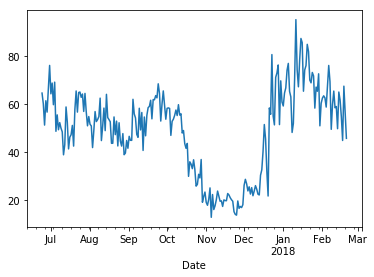

In [52]:
qtum_vix.plot()

In [53]:
qtum_vix[::-1].to_frame

<bound method Series.to_frame of Date
2017-06-24    64.536909
2017-06-25    60.115428
2017-06-26    51.201296
2017-06-27    61.352519
2017-06-28    56.610726
2017-06-29    66.470277
2017-06-30    76.072826
2017-07-01    64.234667
2017-07-02    68.727521
2017-07-03    59.700915
2017-07-04    69.103105
2017-07-05    48.602896
2017-07-06    55.451764
2017-07-07    49.258924
2017-07-08    52.233571
2017-07-09    49.926599
2017-07-10    48.388362
2017-07-11    38.815497
2017-07-12    43.038575
2017-07-13    58.755798
2017-07-14    52.469908
2017-07-15    41.270245
2017-07-16    46.164931
2017-07-17    47.171503
2017-07-18    51.057061
2017-07-19    42.441352
2017-07-20    57.686966
2017-07-21    65.418894
2017-07-22    56.613195
2017-07-23    64.786764
                ...    
2018-01-22    69.984021
2018-01-23    68.816002
2018-01-24    73.138539
2018-01-25    71.684235
2018-01-26    58.272978
2018-01-27    67.040702
2018-01-28    65.301001
2018-01-29    72.576564
2018-01-30    50.892988
20

In [54]:
q_close = coins['qtum'].full_data.loc[:, ['Date', 'Close']]

In [55]:
b = q_close.join(qtum_vix[::-1].to_frame(), on='Date', how='left')

In [56]:
b

,Date,Close,0
0,2018-02-20,31.11,45.672691
1,2018-02-19,32.66,56.389403
2,2018-02-18,31.24,67.426989
3,2018-02-17,33.56,44.783208
4,2018-02-16,33.02,54.614589
5,2018-02-15,33.06,61.663511
6,2018-02-14,32.55,64.980276
7,2018-02-13,30.11,49.702504
8,2018-02-12,30.13,58.925057
9,2018-02-11,27.48,58.421301


In [57]:
b.columns[2]

0

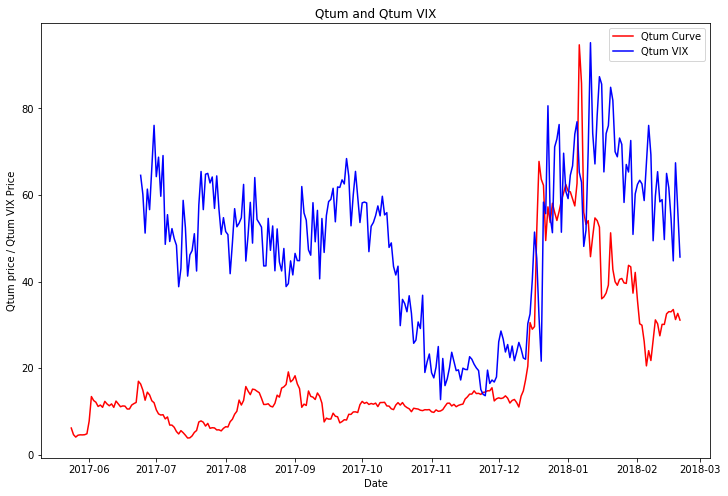

In [58]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax.plot(b['Date'], b['Close'], color='red', label='Qtum Curve')
ax.plot(b['Date'], b[0], color='blue', label='Qtum VIX')
ax.set_title('Qtum and Qtum VIX')
ax.set_ylabel('Qtum price / Qtum VIX Price')
ax.set_xlabel('Date')
ax.legend();

# Parallelize

These vix computations take several hours for each coin. Our team decided to do all the coins at once using a 36 Haskell core AWS CPU (2.9ghz) instance.

In [62]:
import multiprocessing

print(multiprocessing.cpu_count(), 'cores')

36 cores


In [65]:
coin_names = list(coins.keys())

print(coin_names)

['ethereum', 'omisego', 'stratis', 'numeraire', 'neo', 'qtum', 'ripple', 'nem', 'dash', 'litecoin', 'bitcoin', 'bitconnect', 'waves', 'iota', 'monero']


In [ ]:
def coin_vix(coin, N_iter=4, N_paths=100):
    # create vix for a given coin
    
    # for replicability
    np.random.seed(109)
    dates = coin.full_data['Date'][:-31]
    vix = np.empty((len(dates,)))
    
    # create vix for each date
    for i in tqdm.trange(len(dates,)):
        
        vix[i] = cryptoVix(coin, dates[i], 0, N_iter, N_paths)

    out_series = pd.Series(vix)
    out_series.index = dates
    return out_series

In [ ]:


def f(coin_name):
    return coin_vix(coins[coin_name], N_iter=4, N_paths=2)

coin_vixes = []

if __name__ == '__main__':
    with multiprocessing.Pool(32) as p:
        coin_vixes = (p.map(f, coin_names))

 42%|████▏     | 155/366 [02:26<03:18,  1.06it/s]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
  6%|▌         | 89/1437 [02:41<40:39,  1.81s/it]]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
  6%|▌         | 91/1631 [02:58<50:15,  1.96s/it]]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
 35%|███▍      | 174/499 [03:04<05:45,  1.06s/it]]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
 60%|█████▉    | 219/366 [03:26<02:18,  1.06it/s]]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
 11%|█         | 174/1631 [05:34<46:44,  1.93s/it]/home/ubuntu/crypto109/option_pricin

ERROR: lookback window not possible with current start date


 81%|████████▏ | 1329/1631 [41:40<09:28,  1.88s/it]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
100%|█████████▉| 1626/1631 [50:50<00:09,  1.88s/it]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
100%|█████████▉| 1726/1729 [55:28<00:05,  1.93s/it]/home/ubuntu/crypto109/option_pricing.py:118: RuntimeWarning: Mean of empty slice
  emp_price = np.nanmean(payout) * discount_factor
100%|██████████| 1729/1729 [55:34<00:00,  1.93s/it]
Process ForkPoolWorker-60:
Process ForkPoolWorker-54:
Process ForkPoolWorker-50:
Process ForkPoolWorker-79:
Process ForkPoolWorker-80:
Process ForkPoolWorker-71:
Process ForkPoolWorker-70:
Process ForkPoolWorker-49:
Process ForkPoolWorker-69:
Process ForkPoolWorker-67:
Process ForkPoolWorker-76:
Process ForkPoolWorker-72:
Process ForkPoolWorker-64:
Process ForkPoolWorker-77:
Process ForkPoolWo

  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self.

  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with sel

In [ ]:
print(vixes)

In [ ]:
print('done')

In [ ]:
# store objects in file

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


In [ ]:
save_object(coin_vixes, 'coin_vixes_2_paths.pkl')